# Unsupervised Learning: Dimensionality Reduction and Visualization

Unsupervised learning is interested in situations in which X is available, but not y: data without labels.

A typical use case is to find hiden structure in the data.

Previously we worked on visualizing the iris data by plotting
pairs of dimensions by trial and error, until we arrived at
the best pair of dimensions for our dataset.  Here we will
use an unsupervised *dimensionality reduction* algorithm
to accomplish this more automatically.

By the end of this section you will

- Know how to instantiate and train an unsupervised dimensionality reduction algorithm:
  Principal Component Analysis (PCA)
- Know how to use PCA to visualize high-dimensional data

## Dimensionality Reduction: PCA

Dimensionality reduction is the task of deriving a set of new
artificial features that is smaller than the original feature
set while retaining most of the variance of the original data.
Here we'll use a common but powerful dimensionality reduction
technique called Principal Component Analysis (PCA).
We'll perform PCA on the iris dataset that we saw before:

In [9]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Arrage the iris data into feature matrix and label vector

In [10]:
X = iris.data
y = iris.target

PCA is performed using linear combinations of the original features
using a truncated Singular Value Decomposition of the matrix X so
as to project the data onto a base of the top singular vectors.
If the number of retained components is 2 or 3, PCA can be used
to visualize the dataset.

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

Once fitted, the pca model exposes the singular vectors in the components_ attribute:

In [12]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

Other attributes are available as well:

In [13]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [14]:
pca.explained_variance_ratio_.sum()

0.97763177502480325

Let us project the iris dataset along those first two dimensions:

In [15]:
X_pca = pca.transform(X)

In [16]:
np.corrcoef(X_pca.T)

array([[  1.00000000e+00,  -8.14163551e-18],
       [ -8.14163551e-18,   1.00000000e+00]])

We can visualize the projection using pylab, but first
let's make sure our ipython notebook is in pylab inline mode

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Now we can visualize the results using the following utility function:

In [18]:
import matplotlib.pyplot as plt
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

Now calling this function for our data, we see the plot:

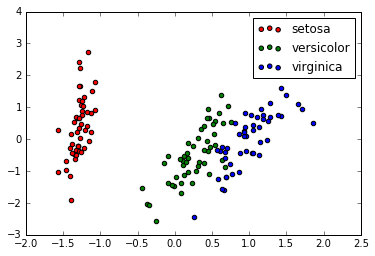

In [19]:
plot_PCA_2D(X_pca, iris.target, iris.target_names)

Note that this projection was determined *without* any information about the
labels (represented by the colors): this is the sense in which the learning
is **unsupervised**.  Nevertheless, we see that the projection gives us insight
into the distribution of the different flowers in parameter space: notably,
*iris setosa* is much more distinct than the other two species.

Note also that the default implementation of PCA computes the
singular value decomposition (SVD) of the full
data matrix, which is not scalable when both ``n_samples`` and
``n_features`` are big (more that a few thousands).
If you are interested in a number of components that is much
smaller than both ``n_samples`` and ``n_features``, consider using
`sklearn.decomposition.RandomizedPCA` instead.

Other dimensionality reduction techniques which are useful to know about:

- [sklearn.decomposition.PCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.PCA.html): 
   Principal Component Analysis
- [sklearn.decomposition.RandomizedPCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.RandomizedPCA.html):
   fast non-exact PCA implementation based on a randomized algorithm
- [sklearn.decomposition.SparsePCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.SparsePCA.html):
   PCA variant including L1 penalty for sparsity
- [sklearn.decomposition.FastICA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.FastICA.html):
   Independent Component Analysis
- [sklearn.decomposition.NMF](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.NMF.html):
   non-negative matrix factorization
- [sklearn.manifold.LocallyLinearEmbedding](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html):
   nonlinear manifold learning technique based on local neighborhood geometry
- [sklearn.manifold.IsoMap](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.Isomap.html):
   nonlinear manifold learning technique based on a sparse graph algorithm

## Manifold Learning

One weakness of PCA is that it cannot detect non-linear features.  A set
of algorithms known as *Manifold Learning* have been developed to address
this deficiency.  A canonical dataset used in Manifold learning is the
*S-curve*:

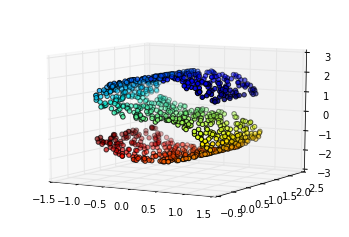

In [20]:
from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.view_init(10, -60)

This is a 2-dimensional dataset embedded in three dimensions, but it is embedded
in such a way that PCA cannot discover the underlying data orientation:

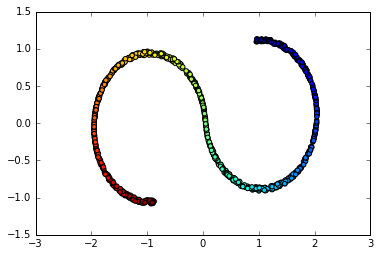

In [21]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

Manifold learning algorithms, however, available in the ``sklearn.manifold``
submodule, are able to recover the underlying 2-dimensional manifold:

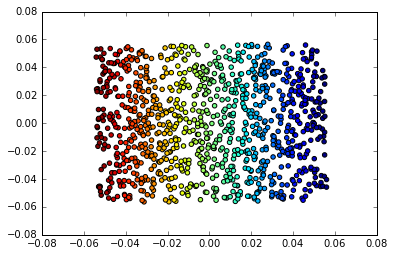

In [22]:
from sklearn.manifold import LocallyLinearEmbedding, Isomap
lle = LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='modified')
X_lle = lle.fit_transform(X)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y)

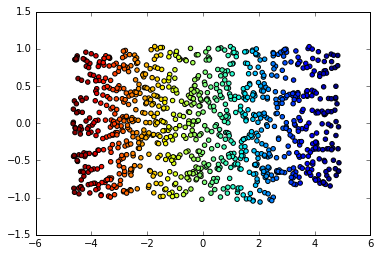

In [23]:
iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y)

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the digits data.

We start by loading the data:

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The data consists of 8×8 pixel images, meaning that they are 64-dimensional.

In [25]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

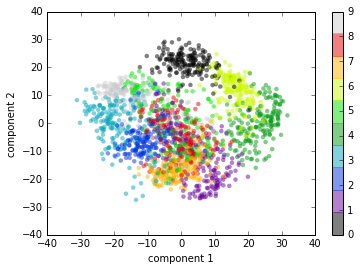

In [26]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
plt.show()

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.